In [12]:
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from scipy import special

In [16]:
def sharlie(n):
    return special.erfinv((n - 1) / n)*np.sqrt(2)

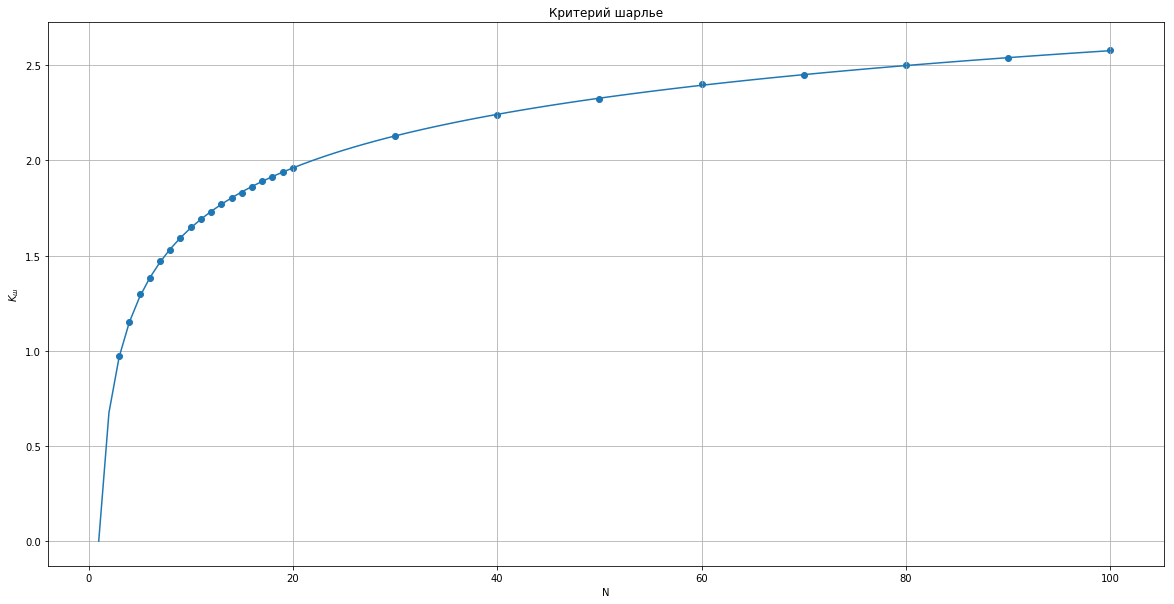

In [89]:
plt.figure(figsize=(20,10))
_x = np.arange(1, 101, 1)
n = [3,4, 5,6,7,8,9, 10,11,12,13,14,15,16,17,18,19, 20, 30, 40, 50, 60, 70, 80 ,90, 100]
K = [0.97, 1.15, 1.3, 1.38,1.47, 1.53,1.59,1.65,1.69,1.73,1.77,1.8,1.83,1.86,1.89,1.91,1.94,1.96,2.13,2.24,2.32,2.40,2.45,2.50,2.54,2.58]
plt.grid(True)
plt.title('Критерий шарлье')
plt.xlabel('N')
plt.ylabel('$K_ш$')
plt.plot(_x, sharlie(_x))
plt.scatter(n, K)
plt.show()

In [29]:
def metric(x):
    return np.abs(x - x.mean()) / np.sqrt(np.sum((x - x.mean())** 2) / (len(x) - 1))

In [30]:
def find_bad(x):

    bad = np.array([])
    test = metric(x)
    mask = test > sharlie(len(test))
    while sum(mask) > 0:
        bad = np.append(bad, x[mask])
        x = x[~mask]
        test = metric(x)
        mask = test > sharlie(len(test))
    return x, bad  

In [31]:
def save_data(x, filename):
    with open(filename, 'w') as f:
        for i in x:
            print(i, file=f)

In [84]:
def calc(filename):
    X = []
    with open(filename, 'r') as f:
        for i in f:
            X.append(float(i.replace(",", ".")))
    X = np.array(X)
    ok, bad = find_bad(X)
    print("Ok: ", *ok)
    print("Bad: ", *bad)
    iterator_ok = np.arange(len(X))[np.isin(X, ok)]
    iterator_bad = np.arange(len(X))[np.isin(X, bad)]
    plt.figure()
    plt.grid(True)
    plt.title('Обработка выборки')
    plt.xlabel('#')
    plt.ylabel('Значение')
    plt.scatter(iterator_ok,ok,  label='Хорошие значения')
    plt.scatter(iterator_bad,bad,  label='Промахи')
    plt.legend()
    plt.show()
    save_data(ok, filename + ".ok.txt")
    save_data(bad, filename + ".bad.txt")    

Ok:  0.64661 0.64603 0.64892 0.64926 0.64795 0.64951 0.64354 0.64439 0.64489 0.64994
Bad:  0.66815


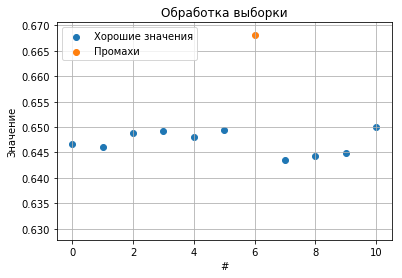

In [85]:
calc('data/Chrl_v06_a.txt')

Ok:  1.5177 1.5227 1.5323 1.5168 1.5275 1.5273 1.53 1.5165 1.5162 1.5205 1.519
Bad:  1.483


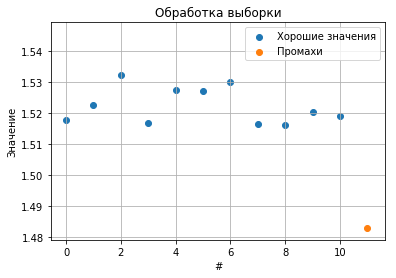

In [86]:
calc('data/Chrl_v06_b.txt')

Ok:  3.6662 3.6518 3.6427 3.6385 3.6762 3.6256 3.6352 3.6591 3.6484 3.6772 3.6683 3.6735 3.6523 3.6588 3.6422 3.6457 3.6343
Bad:  3.6966 3.6171


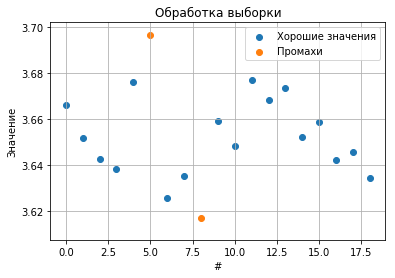

In [87]:
calc('data/Chrl_v06_c.txt')